# Assignment #3 - Reinforcement Learning

### <font color="red"> DUE: Nov 1 (Thursday) 11:00 pm </font>  

<font color="blue"> Soham Devdatta Dhodapkar </font>

# I. Overview

The objective of this assignment is to learn and implement reinforcement learning techniques. We do this by applying the paradigm of reinforcement learning to a maze game and a one card poker game. The problem statement involves engineering a maze agent and a one card poker agent so that they can reach their goal or win state respectively.<br>
The idea behind Reinforcement Learning is that an agent will learn from the environment by interacting with it and receiving rewards for performing actions.<br>
In reinforcement Learning, to have the best behavior, we need to maximize the expected cumulative reward.<br>
We define a discount rate called gamma. It must be between 0 and 1.<br>


# II. Problems 

## A. Maze Problem (Practice)

Describe the problem. Read the following code and explain the GridWorld environment. 

Maze problem consists of a mxm grid in which each subsequent cell is an open space, an obstacle or the final goal state. The agent can start in any open space and has to reach the goal state or goal location. Reinforcement learning works on the concepts of rewards and penalties so the agent gets rewarded every time it moves towards the goal state and also after reaching the goal location. The agent is given a nominal penalty for moving into an open space (just because this open space is not the goal location) and a larger penalty is given if the agent encounters an obstacle. By collecting reward points, the agent learns to reach the goal location without running into any obstacle or going off the grid area.

The very first step, we are going to import all the required libraries.

In [212]:
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Sample Grid Environment File

Simple text file with three characters, 'O', 'H', and 'G'.
- 'O': open space
- 'H': Wall or obstacles
- 'G': Goal location 

In [213]:
file = open('grid.txt')
print(file.read())

OOOHOOOOO
OOOHOOHOO
OOOOOOHOO
OOOOHHHOG
OOHOOOOOH
OOHOOOHOO
OOOOOOOOO


In the above section, we have opened a file handle for the the text file (grid.txt) which is going to be the input for the RL agent below.

### GridWorld Class


The gridworld class is the reinforcement learning agent class for the maze problem which will learn and solve the maze problem. The agent gets the assignment from the text file above (grid.txt) which is feeded to the agent. In the init function, the file will be opened and converted to a matrix.

In [214]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
               grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
               return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In the above section, we have created the gridworld environment. As mentioned in the description,             there are four actions (left, right, up, and down) to move an agent in a grid, if it reaches a goal, it get 30 points of reward. If it falls in a hole or moves out of the grid world, it gets -5. Each step costs -1 point.<br>
In this gridworld class, we have created an environment for our agent and mapped it to the maze gridworld. This also includes invalid states, wrong moves and wrong input for the check state function.

In [215]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'G']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


This is how the map of the gridworld looks like where each element is an element in a matrix. As we can see, goal position is at the 6 x 7th location i.e 6th row, 7th column

In [216]:
# top-left to (0,0)
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

## B. One-Card Poker  

![](http://www.poker-vibe.com/poker/terms/case-card/Case-Card.jpg)

<font color="red"> Game Introduction and Rules: </font>
1. This is a 1-card poker game. Where each player can blindly bet from 0 (fold), 1, 2 or 3 in the first round. In the next round only the player who havent matched the max amount( from all the players) will be given a chance to bet additional amount to match or fold. 


2. Each player will be able to see his/her own card and the total pot balance and all other player's balance and their current bet on for the round i.e this is what you can call the current state of the game. <br>

    a. <font color="red"> Example1 </font>: 3 players in game i.e. player1, computer1, computer2. First round, player1        bets 3, computer1 bets 2 and computer2 bets 1. Next round only computer1 and computer2 will be given a chance          to match the bet as player1 has max bet so computer1's available actions will be (0, 1) and computer2's                available actions will be (0, 2).<br>
    
    b. After they match or fold the result will be given. <br>
    
    c. This case is applicable for player1 being the one who needs to match. <font color="red"> Example2 </font>: 3          players in game i.e player1, computer1, computer2. First round, player1 bets 1, computer1 bets 2 and                  computer2 bets 3. Next round only player1 and computer1 will have chance to bet and match or fold. <br>
       
    d. The examples described above will be 1 round each, this will continue until player1 losses all the money or            computer1 and computer2 will be out of money. <br>
    
This is a local version of the game, your final competition if you decide to participate will be hosted on server. The local version, you can add multiple computer players in the game but only single agent.

This way you can train your agent to play against 1,2,3,4 


## One-Card Poker Environment

In [217]:
import copy
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
def draw_card():
    return deck[np.random.randint(1, 13)]

In [218]:
class Player():
    """
        
        Player class to create a player object.
        eg: player = Player("player1", start_balance = 10, is_computer = 0)
        Above declaration will be for your agent. Only one non-computer
        player allowed in the local poker instance.
        However, you can create as many as you want computer_players 
        (test for 3 players but you can try more) i.e
        computer = Player("computer", start_balance = 10, is_computer = 1).
        All the player names should be unique or else you will get error.
        
    """
    def __init__(self, player_name, start_balance = 10, is_computer = 0):
        self.player_name = player_name
        self.card = None
        self.total_balance = start_balance
        self.current_bet = 0
        self.is_computer = is_computer
        self.is_active = 0
        self.number_of_turn = 0
        self.match_bet = False
    
    def get_info(self):
        print("Player name: {}".format(self.player_name))
        print("Player card: {}".format(self.card))
        print("Player total_balance: {}".format(self.total_balance))
        print("Player is_active: {}".format(self.is_active))
        

In [219]:
class Poker():
    """
        Poker class will be the environment. 
        Important functions for users:
        1. Init Poker class i.e poker = Poker(number_of_player = 2)
           <Please dont add more than the number you declare here)
        2. add_player(player1) - adds player1 object to the game.
        3. get_current_state - gets the current state of the env
           {'other_stats': [[9, 1] ,[9, 1]], 'total_pot_balance': 2, 'player_stats': [6, 9, 1]}
           other_stats will contain the opponent information's balance and their current bet
           total_pot_balance will have total bet played by all players
           player_stats will contain player_card, player total balance, player current bet
        4. get_valid_actions -  returns the valid action available for the player
           based on balance and which round the player is in. You should take actions
           based on the return value.
           
    
    """
    def __init__(self, number_of_player = 2):
        self.all_players = []
        self.total_players = number_of_player
        self.total_pot_balance = 0
        self.player = None
        self.actions = [0, 1, 2, 3]
        self.number_of_turn = 0
        self.max_bet = 0
        
    def add_player(self, player_class):
        if player_class not in self.all_players and self.total_players > 0:
            self.all_players.append(player_class)
            self.total_players -= 1
            if player_class.is_computer == 0:
                if self.player == None:
                    self.player = player_class
                else:
                    raise Exception("Will override current player ! Only one non-computer player allowed !")
        else:
            raise Exception("Maximum number of player allowed: {}. You can increase the player count while initializing the environment".format(len(self.all_players)))
    
    def check_and_remove_players(self):
        player_remove, game_end = [], False
        for _player in self.all_players:
            if _player.total_balance <= 1:
                player_remove.append(_player)
        if len(player_remove) > 0:
            if self.player not in player_remove:
                for player in player_remove:
                    print("Removing player: {} due to insufficient funds !!".format(player.player_name))
                    self.all_players.remove(player)                    
            else:
                print("Player doesnt have balance !")
                game_end = True
                
                
    def deal(self):
        reset_game = False
        self.total_pot_balance = 0
        self.number_of_turn = 0
        
        if self.check_and_remove_players():
            reset_game = True
        else:
            if len(self.all_players) == 1:
                reset_game = True
            else:
                for _player in self.all_players:
                    if _player.total_balance > 1:
                        _player.card = draw_card()
                        _player.total_balance -= 1
                        _player.current_bet = 1
                        _player.is_active = 1
                        _player.number_of_turn = 0
                        _player.match_bet = False
                        self.total_pot_balance += 1
                        self.max_bet = 0
                    else:
                        print("{} can no longer play the game !".format(_player.player_name))
                        reset_game = True        
        return reset_game
        
    def get_current_state(self):
        current_state_dict = {}
        current_state_dict['other_stats'] = [[_player.total_balance,_player.current_bet] for _player in self.all_players if _player != self.player]
        current_state_dict['total_pot_balance'] = self.total_pot_balance
        current_state_dict['player_stats'] = [self.player.card, self.player.total_balance, self.player.current_bet]
        return current_state_dict
    
    def get_valid_actions(self, player_name):
        list_player = [_player for _player in self.all_players if _player.player_name == player_name]
        if len(list_player) == 1:
            player = list_player[0] 
            if player.number_of_turn == 0:
                if player.total_balance > 3:
                    actions =  [0, 1, 2, 3]
                elif player.total_balance <= 3:
                    if player.total_balance <= 1:
                        actions = [0]
                    elif player.total_balance > 1 and player.total_balance <= 2:
                        actions =  [0, 1]
                    else:
                        actions = [0, 1, 2]
            else:
                possible_max_bet = player.total_balance - (self.max_bet - (player.current_bet - 1))
                if possible_max_bet >= 2:
                    actions = [0, self.max_bet - (player.current_bet - 1)]
                else:
                    actions = [0]                        
            return actions
        else:
            raise Exception("Invalid player name! Use the player name defined while initialzing the environment")
    
    def print_actions(self, player, action):
        if action == 0:
            print("{} folds".format(player))
        else:
            print("{} plays {}.".format(player, action))
            
    def computer_play(self):
        list_player = [_player for _player in self.all_players if _player.player_name != self.player.player_name and _player.is_active == 1 and _player.match_bet == False]
        for player in list_player:
            actions_available = poker.get_valid_actions(player.player_name)    
            print("Available actions for: {} are {}".format(player.player_name, actions_available))
            action_taken = actions_available[np.random.randint(len(actions_available))]
            self.print_actions(player.player_name, action_taken)
            if self.max_bet == 0 and action_taken != 0 or self.max_bet < action_taken:
                self.max_bet = action_taken
            self.take_action(player.player_name, action_taken)
    
    def get_player(self, player_name):
        return_player = [player for player in self.all_players if player.player_name == player_name]
        if len(return_player) != 1:
            print("Invalid Player")
            return None
        else:
            return return_player[0]
        
    def take_action(self, player_name, action_taken):
        player = self.get_player(player_name)
        player.number_of_turn += 1
        if action_taken != 0:
            player.total_balance -= action_taken
            player.current_bet += action_taken
            self.total_pot_balance += action_taken
            player.is_active = 1
        else:
            player.is_active = 0
            
    def check_game(self):
        game_over = True
        if np.sum([_player.is_active for _player in self.all_players if _player != self.player]) > 0:
            game_over = False
        return game_over
     
    def return_winner(self, players):
        max_card = np.max([_player.card for _player in players])
        return [_player for _player in players if _player.card == max_card]
            

    def settle_balance(self, winner):
        reward = 0
        if winner == "draw":
            active_player = [_player for _player in self.all_players if _player.is_active]
            if len(active_player) == 0:
                print("Active player cards: {}".format([(_player.player_name, _player.card) for _player in self.all_players]))
                winning_players = self.all_players
            else:
                print("Active player cards: {}".format([(_player.player_name, _player.card) for _player in self.all_players if _player.is_active]))
                winning_players = self.return_winner(active_player)
                
            per_player_share = self.total_pot_balance / len(winning_players)
            for _player in winning_players:
                _player.total_balance += per_player_share
            if self.player in winning_players:
                reward = per_player_share
            else:
                reward = -self.player.current_bet
            
                
        if winner == "player":
            self.player.total_balance += self.total_pot_balance
            reward = self.total_pot_balance
            winning_players = [self.player]
            
        if winner == "computer":
            active_player = [_player for _player in self.all_players if _player != self.player and _player.is_active]
            winning_players = self.return_winner(active_player)
            per_player_share = self.total_pot_balance / len(winning_players)
            for _player in winning_players:
                _player.total_balance += per_player_share
            reward = -self.player.current_bet
            
        print("Printing winning players: {}".format(' '.join([player.player_name for player in winning_players])))
        print("Reward : {}".format(reward))
        return reward
        
    def check_game_return_reward(self, round_num):
        print("Check results for Round Number: {}".format(round_num))
        if self.check_game() and self.player.is_active == 0:
            print("Computer folds, Player folds !")
            game_over = True
            winner = "draw"
            reward = 0
            return game_over, reward, winner 
        
        elif self.check_game() and self.player.is_active:
            print("Computer folds, Player active !")
            game_over = True
            reward = self.total_pot_balance
            winner = "player"
            return game_over, reward, winner 
        
        elif not self.check_game() and self.player.is_active == 0:
            print("Computer active, Player folds !")
            game_over = True
            reward = -self.player.current_bet
            winner = "computer"
            return game_over, reward, winner 

        if round_num == 1:
            print("Computer active, Player active ! ")
            game_over = False
            reward = 0
            winner = "draw"
            return game_over, reward, winner 
        
        else:
            print("Computer active, Player active in Round 2 ! End game now !")
            game_over = True
            active_players = [player for player in self.all_players if player.is_active]
            print("Active player cards: {}".format([(_player.player_name, _player.card) for _player in active_players]))
            winning_players = self.return_winner(active_players)
            if self.player in winning_players:
                if len(winning_players) > 1:
                    reward = self.total_pot_balance / len(winning_players)
                    winner = "draw"
                else:
                    reward = self.total_pot_balance
                    winner = "player"
            else:
                reward = -self.player.current_bet
                winner = "computer"

            return game_over, reward, winner 
            

    
    def update_match(self):
        for player in [player for player in self.all_players if player.current_bet - 1 == self.max_bet]:
            player.match_bet = True
    
    def check_computer_status(self):
        computer_play = False
        if len([player for player in self.all_players if player.is_computer == 1 and player.match_bet == False and player.is_active == 1]) > 0:
            computer_play = True
        return computer_play
    
    def player_play(self, player_name, action_taken):
        game_over = False
        reward = 0  
        winner = None
        self.number_of_turn += 1
        
        if self.number_of_turn == 1:
            if self.max_bet == 0 and action_taken != 0 or self.max_bet < action_taken:
                self.max_bet = action_taken
            self.print_actions(player_name, action_taken)
            self.computer_play()
            self.take_action(player_name, action_taken)
            self.update_match()
            if self.player.is_active:
                if self.player.match_bet and not self.check_computer_status():
                    print("Player and Computer both Bet Max and match !")
                    _, reward, winner = self.check_game_return_reward(round_num=1)
                    game_over = True
            else:
                if self.check_computer_status():
                    print("Player folds, computer players are active, they will play among themselves !")
                    self.computer_play()
                game_over, reward, winner = self.check_game_return_reward(round_num=1)
                
            if game_over:
                print("Winner: {}".format(winner))
                new_reward = self.settle_balance(winner)
                if winner == "draw":
                    reward = new_reward
            else:
                if self.player.match_bet and self.check_computer_status():
                    print("Player Bet Max, computer will match now !")
                    self.computer_play()
                    game_over, reward, winner = self.check_game_return_reward(round_num=2)
                    print("Winner: {}".format(winner))
                    new_reward = self.settle_balance(winner)
                    if winner == "draw":
                        reward = new_reward
                    
            return self.get_current_state(), reward, game_over
        
        if self.number_of_turn == 2:
            self.print_actions(player_name, action_taken)
            self.take_action(player_name, action_taken)
            if self.check_computer_status():
                self.computer_play()
            game_over = True
            _, reward, winner = self.check_game_return_reward(round_num=2)
            print("Winner: {}".format(winner))
            new_reward = self.settle_balance(winner)
            if winner == "draw":
                reward = new_reward
        
        return self.get_current_state(), reward, game_over
    
    
        

Explanation of Poker class : <br>
The init function is responsible for initialising important parameters which will be further used in the program. Q table, epsilon, gamma, alpha are some of the parameters which will be used in the program.<br>
The add_player function will add players according to the number of players decided or until maximum number of players is filled.<br>
The check_and_remove_players will check the total funds of a player and remove the player if funds are insufficient.<br>
The deal function will actually deal the cards for the game out of the 13 cards. Here, the player will be removed if funds are insufficient.<br>
The get current_state_state function will be used to get the state of the game such as stats, pot balance,player stats.<br>
The get_valid_actions will get the valid actions according to the betting if it is 0,1,2 or 3.<br>
The computer_play function is responsible for the computer's move in the poker game.<br>
The settle_balance function will settle the funds at the end of the game according to who wins.<br>


### Example Run with Random Players

In [220]:
poker = Poker(number_of_player=3)
player1 = Player("prajval", start_balance = 10, is_computer =  0)
computer1 = Player("computer1", start_balance = 10, is_computer = 1)
computer2 = Player("computer2", start_balance = 10, is_computer = 1)
poker.add_player(player1)
poker.add_player(computer1)
poker.add_player(computer2)
while not poker.deal():
    print("-"*50)
    print("Deal Start!")
    print("Start State: {}".format(poker.get_current_state()))
    actions = poker.get_valid_actions("prajval")
    print("Available actions for: prajval are {}".format(actions))
    action_taken = actions[np.random.randint(len(actions))]
    result = poker.player_play("prajval", action_taken)
    while not result[-1]:
        actions = poker.get_valid_actions("prajval")
        print("Available actions for: prajval are {}".format(actions))
        action_taken = actions[np.random.randint(len(actions))]
        result = poker.player_play("prajval", action_taken)
    print("Final Result: {}".format(result))
    print("*"*50)
    

--------------------------------------------------
Deal Start!
Start State: {'other_stats': [[9, 1], [9, 1]], 'total_pot_balance': 3, 'player_stats': [7, 9, 1]}
Available actions for: prajval are [0, 1, 2, 3]
prajval plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 2.
Available actions for: computer2 are [0, 1, 2, 3]
computer2 plays 3.
Available actions for: prajval are [0, 1]
prajval plays 1.
Available actions for: computer1 are [0, 1]
computer1 folds
Check results for Round Number: 2
Computer active, Player active in Round 2 ! End game now !
Active player cards: [('prajval', 7), ('computer2', 13)]
Winner: computer
Printing winning players: computer2
Reward : -4
Final Result: ({'other_stats': [[7, 3], [17.0, 4]], 'total_pot_balance': 11, 'player_stats': [7, 6, 4]}, -4, True)
**************************************************
--------------------------------------------------
Deal Start!
Start State: {'other_stats': [[6, 1], [16.0, 1]], 'total_pot_balance': 3,

Computer active, Player folds !
Winner: computer
Printing winning players: computer2
Reward : -1
Final Result: ({'other_stats': [[23.0, 3]], 'total_pot_balance': 4, 'player_stats': [2, 6.0, 1]}, -1, True)
**************************************************
--------------------------------------------------
Deal Start!
Start State: {'other_stats': [[22.0, 1]], 'total_pot_balance': 2, 'player_stats': [7, 5.0, 1]}
Available actions for: prajval are [0, 1, 2, 3]
prajval plays 3.
Available actions for: computer2 are [0, 1, 2, 3]
computer2 plays 1.
Player Bet Max, computer will match now !
Available actions for: computer2 are [0, 2]
computer2 plays 2.
Check results for Round Number: 2
Computer active, Player active in Round 2 ! End game now !
Active player cards: [('prajval', 7), ('computer2', 12)]
Winner: computer
Printing winning players: computer2
Reward : -4
Final Result: ({'other_stats': [[27.0, 4]], 'total_pot_balance': 8, 'player_stats': [7, 2.0, 4]}, -4, True)
************************

In [221]:
poker.deal()

Player doesnt have balance !
prajval can no longer play the game !


True

Since the player is out of balance, he cannot play the game.

In [222]:
poker.get_current_state()

{'other_stats': [[26.0, 1]],
 'total_pot_balance': 1,
 'player_stats': [10, 1.0, 1]}

In [223]:
poker.get_valid_actions("prajval")

[0]

In [224]:
poker.player_play("prajval", 1)

prajval plays 1.
Available actions for: computer2 are [0, 1, 2, 3]
computer2 plays 3.


({'other_stats': [[23.0, 4]],
  'total_pot_balance': 5,
  'player_stats': [10, 0.0, 2]},
 0,
 False)

# III. Methods

#### * TD-Learning : <br>
When there are large number of states, the memory requirement grows exponentially. Temporal difference (TD) learning considers that the agent knows only the partial information of the MDP. With only current and next state transition and without any model transition probability, TD lets the agent explore the environment to examine the random policy. With an estiate of the value function V(s), V^(s).


The parameters used in the Q-value update process are:

   -the learning rate, set between 0 and 1. Setting it to 0 means that the Q-values are never updated, hence nothing is learned. Setting a high value such as 0.9 means that learning can occur quickly. 

   -discount factor, also set between 0 and 1. This models the fact that future rewards are worth less than immediate rewards. Mathematically, the discount factor needs to be set less than 0 for the algorithm to converge. 

   -the maximum reward that is attainable in the state following the current one. i.e the reward for taking the optimal action thereafter. 


#### * SARSA : <br>
The Sarsa algorithm is an On-Policy algorithm for TD-Learning. The major difference between it and Q-Learning, is that the maximum reward for the next state is not necessarily used for updating the Q-values. Instead, a new action, and therefore reward, is selected using the same policy that determined the original action. The name Sarsa actually comes from the fact that the updates are done using the quintuple Q(s, a, r, s', a'). Where: s, a are the original state and action, r is the reward observed in the following state and s', a' are the new state-action pair.

#### * Q-Learning : <br>
Q-Learning is an Off-Policy algorithm for Temporal Difference learning. It can be proven that given sufficient training under any -soft policy, the algorithm converges with probability 1 to a close approximation of the action-value function for an arbitrary target policy. Q-Learning learns the optimal policy even when actions are selected according to a more exploratory or even random policy. 

#### * Difference : <br>
Well, not actually. A key difference between SARSA and Q-learning is that SARSA is an on-policy algorithm (it follows the policy that is learning) and Q-learning is an off-policy algorithm (it can follow any policy (that fulfills some convergence requirements). They mostly look the same except that in SARSA we take actual action and in Q Learning we take the action with highest reward.\

#### - Describe your approach and the reason why you select it.
Q-learning has the following advantages and disadvantages compared to SARSA:
Q-learning directly learns the optimal policy, whilst SARSA learns a near-optimal policy whilst exploring. If you want to learn an optimal policy using SARSA, then you will need to decide on a strategy to decay ϵ in ϵ-greedy action choice, which may become a fiddly hyperparameter to tune. Q-learning (and off-policy learning in general) has higher per-sample variance than SARSA, and may suffer from problems converging as a result. This turns up as a problem when training neural networks via Q-learning. SARSA will approach convergence allowing for possible penalties from exploratory moves, whilst Q-learning will ignore them. That makes SARSA more conservative - if there is risk of a large negative reward close to the optimal path, Q-learning will tend to trigger that reward whilst exploring, whilst SARSA will tend to avoid a dangerous optimal path and only slowly learn to use it when the exploration parameters are reduced. 

## RLAgent for Maze

Read the understand the codes below and explain it with your words. 
Do NOT forget to answer the question. 

In [225]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, evn):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    def epsilon_greed(self, epsilon, s):
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0],s[1]]) 
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(epsilon, s1)

                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table 
                self.Q[s[0],s[1], a] = self.Q[s[0],s[1], a] + alpha * (r + gamma * self.Q[s1[0],s1[1], a1] - self.Q[s[0],s[1],a])
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
       
        epsilon= 0.1
        alpha = 0.1
        gamma = 0.99
        
        for i in range(maxstep):
            env.init(start)
            s = env.get_cur_state()
            a = self.epsilon_greed(epsilon, s)
            rewards = []
            trace = np.array(coord_convert(s, self.size)) 
            
            for step in range(maxstep):
                r = env.next(a)
                s1 = env.get_cur_state()
                print(s1)
                a1 = self.epsilon_greed(epsilon, s1)
                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))
                self.Q[s[0],s[1], a] += alpha * (r + gamma * self.Q[s1[0],s1[1], a1] - self.Q[s[0],s[1],a])
                
                if env.is_goal():
                    self.Q[s1[0], s1[1], a1] = 0
                    break
                    
                s = s1
                a = a1
            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return trace            

## RLAgent for One-Card Poker

Trail run for poker game with 2 players and extended pot balance.

In [226]:
poker = Poker(number_of_player=2)
player1 = Player("Soham", start_balance = 20, is_computer =  0)
computer1 = Player("computer1", start_balance = 20, is_computer = 1)
#computer2 = Player("computer2", start_balance = 10, is_computer = 1)
poker.add_player(player1)
poker.add_player(computer1)
#poker.add_player(computer2)
while not poker.deal():
    print("-"*50)
    print("Deal Start!")
    print("Start State: {}".format(poker.get_current_state()))
    actions = poker.get_valid_actions("Soham")
    print("Available actions for: Soham are {}".format(actions))
    action_taken = actions[np.random.randint(len(actions))]
    result = poker.player_play("Soham", action_taken)
    while not result[-1]:
        actions = poker.get_valid_actions("Soham")
        print("Available actions for: Soham are {}".format(actions))
        action_taken = actions[np.random.randint(len(actions))]
        result = poker.player_play("Soham", action_taken)
    print("Final Result: {}".format(result))
    print("*"*50)
    

--------------------------------------------------
Deal Start!
Start State: {'other_stats': [[19, 1]], 'total_pot_balance': 2, 'player_stats': [13, 19, 1]}
Available actions for: Soham are [0, 1, 2, 3]
Soham plays 2.
Available actions for: computer1 are [0, 1, 2, 3]
computer1 plays 1.
Player Bet Max, computer will match now !
Available actions for: computer1 are [0, 1]
computer1 plays 1.
Check results for Round Number: 2
Computer active, Player active in Round 2 ! End game now !
Active player cards: [('Soham', 13), ('computer1', 2)]
Winner: player
Printing winning players: Soham
Reward : 6
Final Result: ({'other_stats': [[17, 3]], 'total_pot_balance': 6, 'player_stats': [13, 23, 3]}, 6, True)
**************************************************
--------------------------------------------------
Deal Start!
Start State: {'other_stats': [[16, 1]], 'total_pot_balance': 2, 'player_stats': [9, 22, 1]}
Available actions for: Soham are [0, 1, 2, 3]
Soham folds
Available actions for: computer1 a

In [227]:
class PokerAgent(Poker):
    def __init__(self):
        self.n_a = len(action_taken)
        self.Q = np.zeros(13,20,7,4)
    
    def epsilon_greedy(self, epsilon, s):
        # TODO: Finish this function
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return np.argmax(self.Q[s[0],s[1].s[2]]) 
    
    def train(self, start, **params):
        
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        #maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        for j in range(maxiter):
            #env.init(start)
            ocpoker = Poker(number_of_player=3)
            player1 = Player("Soham", start_balance = 10, is_computer =  0)
            computer1 = Player("computer1", start_balance = 10, is_computer = 1)
            #computer2 = Player("computer2", start_balance = 10, is_computer = 1)
            poker.add_player(player1)
            poker.add_player(computer1)
            #poker.add_player(computer2)
            s = print("Start State: {}".format(poker.get_current_state()))
            # selection an action
            actions = self.epsilon_greedy(epsilon, s)
            rewards = []
                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table 
            self.Q[s[0]-1,s[1],s[2],a] += self.alpha * (r + self.gamma * self.Q[s1[0]-1,s1[1],s[2], a1] - self.Q[s[0]-1,s[1],s[2],a])
            print(self.Q)
            break

            s = s1
            a = a1
            
            while not poker.deal():
                print("-"*50)
                print("Deal Start!")
                print("Start State: {}".format(poker.get_current_state()))
                actions = poker.get_valid_actions("Soham")
                print("Available actions for: Soham are {}".format(actions))
                action_taken = self.epsilon_greedy(epsilon,s)
                #np.random.randint(len(actions))
                result = poker.player_play("Soham", action_taken)
                while not result[-1]:
                    actions = poker.get_valid_actions("Soham")
                    print("Available actions for: Soham are {}".format(actions))
                    action_taken = self.epsilon_greedy(epsilon,s)
                    result = poker.player_play("Soham", action_taken)
                print("Final Result: {}".format(result))
                print("*"*50)
                                                                                                                       

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory
                                                                                                                                   

    def test(self, start, maxstep=1000):
       
        epsilon= 0.1
        alpha = 0.1
        gamma = 0.99
        
        while not poker.deal():
            print("-"*50)
            print("Deal Start!")
            print("Start State: {}".format(poker.get_current_state()))
            actions = poker.get_valid_actions("Soham")
            print("Available actions for: Soham are {}".format(actions))
            action_taken = self.epsilon_greedy(epsilon,s)
            
            
        while not result[-1]:
            actions = poker.get_valid_actions("Soham")
            print("Available actions for: Soham are {}".format(actions))
            action_taken = self.epsilon_greedy(epsilon,s)
            result = poker.player_play("Soham", action_taken)
        print("Final Result: {}".format(result))
        print("*"*50)     

        rtrace.append(np.sum(rewards))
            #steps.append(step+1)
        return trace

The above code for one-card poker agent is quite similar to the maze agent and the poker environment example play, where in the actions have been replaced with epsilon_greedy table values for actions and rewards have been appended.

### Utility functions for Plotting

- finish the TODOs here for plotting

In [228]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    # TODO: plot rewards
    ax.plot(rtrace)
    plt.ylabel("sum of rewards")

    ax1 = fig.add_subplot(222)
    # TODO: plot steps
    ax1.plot(steps)
    plt.ylabel("# steps")

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

### Training and Testing with GridWorld

In [229]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=500)

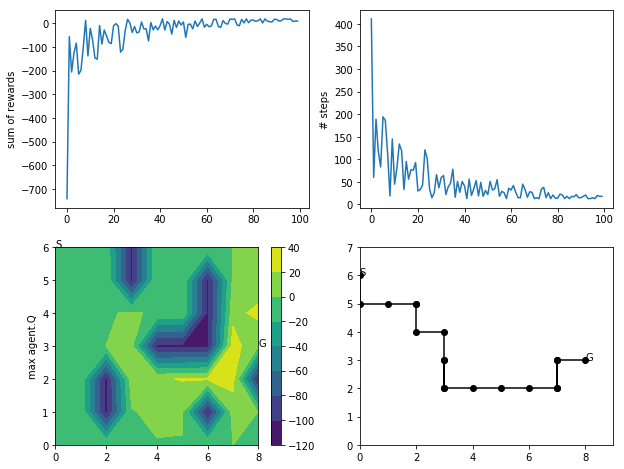

In [230]:
plot_train(agent, rtrace, steps, trace, start)

In [231]:
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.9, 
                                   alpha=0.1, 
                                   epsilon=0.5, 
                                   maxiter=500, 
                                   maxstep=100)

[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[2 4]
[2 5]
[1 5]
[0 5]
[0 6]
[0 7]
[1 7]
[2 7]
[2 8]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 0]
[2 1]
[2 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[0 1]
[1 1]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1

[3 3]
[4 3]
[4 4]
[4 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[3 2]
[3 1]
[3 2]
[3 3]
[4 3]
[4 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[5 7]
[4 7]
[3 7]
[3 8]
[1 0]
[0 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[2 3

[4 3]
[4 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[5 3]
[5 4]
[5 5]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[0 0]
[1 0]
[2 0]
[2 1]
[2 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3

[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[5 7]
[4 7]
[3 7]
[3 8]
[1 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3

[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 5]
[4 6]
[4 5]
[4 6]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[2 4]
[2 5]
[1 5]
[0 5]
[0 6]
[0 7]
[1 7]
[2 7]
[3 7]
[3 8]
[0 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[1 0]
[2 0]
[2 1]
[3 1]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 0]
[2 1]
[2 2]
[3 2

[4 7]
[3 7]
[4 7]
[3 7]
[3 8]
[0 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[1 0]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 6]
[4 7]
[5 7]
[6 7]
[5 7]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[3 2]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3

[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[3 0]
[3 1]
[3 2]
[3 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[3 0]
[3 0]
[3 1]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7

[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[5 3]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0

[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[2 4]
[2 5]
[1 5]
[0 5]
[0 6]
[0 7]
[0 8]
[1 8]
[2 8]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[0 0]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[2 0]
[2 1]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6

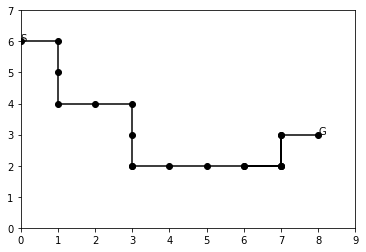

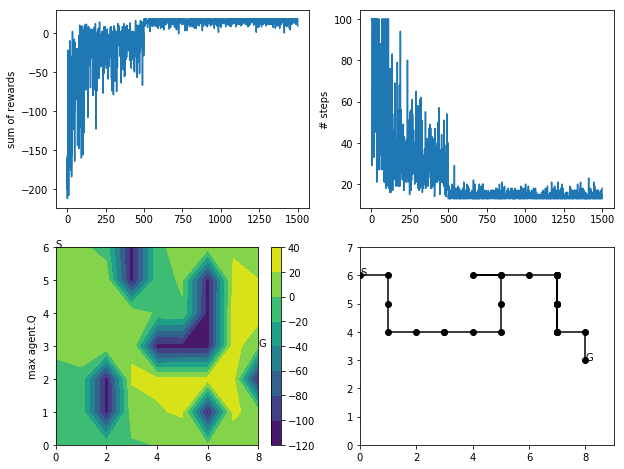

In [232]:
test_start = [0,0]
test_trace = agent.test(test_start)
plot_trace(agent,test_start,test_trace)
plot_train(agent, rtrace, steps, trace, start)

[5 0]
[5 1]
[4 1]
[4 1]
[3 1]
[3 2]
[2 2]
[1 2]
[2 2]
[2 3]
[2 2]
[3 2]
[3 1]
[2 1]
[2 2]
[2 1]
[3 1]
[4 1]
[5 1]
[6 1]
[6 0]
[5 0]
[6 0]
[6 1]
[6 2]
[6 3]
[6 4]
[5 4]
[4 4]
[4 3]
[4 4]
[5 4]
[6 4]
[6 5]
[6 4]
[6 3]
[6 2]
[6 1]
[5 1]
[6 1]
[6 0]
[6 1]
[6 2]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[3 3]
[4 3]
[5 3]
[6 3]
[6 4]
[6 5]
[5 5]
[5 4]
[5 5]
[6 5]
[6 6]
[6 5]
[6 6]
[6 7]
[6 8]
[5 8]
[5 7]
[4 7]
[3 7]
[3 8]
[5 0]
[6 0]
[5 0]
[4 0]
[4 1]
[4 0]
[4 1]
[5 1]
[6 1]
[6 1]
[5 1]
[4 1]
[3 1]
[3 0]
[3 1]
[3 2]
[3 3]
[3 2]
[3 3]
[2 3]
[2 4]
[1 4]
[1 5]
[2 5]
[1 5]
[1 4]
[2 4]
[2 5]
[2 4]
[2 3]
[3 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 0]
[5 1]
[5 0]
[4 0]
[3 0]
[4 0]
[5 0]
[6 0]
[6 1]
[6 0]
[5 0]
[4 0]
[3 0]
[2 0]
[2 1]
[3 1]
[4 1]
[4 0]
[5 0]
[5 1]
[4 1]
[5 1]
[5 0]
[6 0]
[6 1]
[6 2]
[6 3]
[5 3]
[5 3]
[5 4]
[5 3]
[5 4]
[6 4]
[5 4]
[4 4]
[5 4]
[5 5]
[5 4]
[5 3]
[5 4]
[6 4]
[6 3]
[6 2]
[6 1]
[6 0]
[5 0]
[5 1]
[6 1]
[5 1]
[4 1]
[3 1]
[3 0]
[4 0]
[4 1

[4 1]
[3 1]
[4 1]
[5 1]
[5 0]
[6 0]
[6 1]
[5 1]
[6 1]
[6 0]
[5 0]
[4 0]
[3 0]
[4 0]
[4 1]
[4 0]
[3 0]
[2 0]
[1 0]
[0 0]
[0 0]
[1 0]
[1 1]
[1 0]
[2 0]
[2 1]
[2 2]
[3 2]
[2 2]
[2 1]
[2 0]
[3 0]
[3 1]
[3 0]
[2 0]
[3 0]
[3 1]
[3 2]
[3 3]
[3 2]
[3 1]
[2 1]
[1 1]
[0 1]
[0 2]
[1 2]
[2 2]
[2 1]
[3 1]
[3 2]
[2 2]
[2 3]
[2 4]
[2 3]
[2 2]
[3 2]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 4]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[4 1]
[3 1]
[4 1]
[3 1]
[3 0]
[4 0]
[5 0]
[5 1]
[5 0]
[6 0]
[6 0]
[6 1]
[6 2]
[6 3]
[6 4]
[5 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 2]
[6 1]
[6 0]
[5 0]
[4 0]
[3 0]
[4 0]
[4 1]
[4 0]
[5 0]
[5 1]
[4 1]
[5 1]
[6 1]
[5 1]
[5 0]
[4 0]
[3 0]
[2 0]
[1 0]
[1 1]
[2 1]
[1 1]
[1 2]
[0 2]
[0 2]
[0 2]
[0 1]
[0 1]
[0 0]
[0 1]
[1 1]
[0 1]
[0 2]
[1 2]
[1 1]
[2 1]
[2 0]
[2 1]
[2 2]
[1 2]
[2 2]
[2 3]
[2 4]
[2 5]
[1 5]
[0 5]
[0 6]
[0 5]
[0 4]
[0 5]
[0 6]
[0 7]
[0 8]
[0 7]
[0 7]
[0 6]
[0 7]
[0 6]
[0 5]
[1 5]
[2 5]
[2 4]
[1 4]
[1 5]
[0 5]
[0 6]
[0 7]
[1 7

[6 2]
[6 3]
[6 3]
[6 2]
[6 3]
[6 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 0]
[6 0]
[5 0]
[4 0]
[3 0]
[2 0]
[1 0]
[1 1]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[2 4]
[2 5]
[1 5]
[2 5]
[2 4]
[1 4]
[1 5]
[1 4]
[0 4]
[0 5]
[1 5]
[1 5]
[0 5]
[0 6]
[0 6]
[0 6]
[0 7]
[0 8]
[1 8]
[2 8]
[3 8]
[5 1]
[4 1]
[4 0]
[5 0]
[6 0]
[6 1]
[6 0]
[5 0]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[4 1]
[3 1]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 0]
[5 0]
[5 0]
[4 0]
[3 0]
[3 1]
[2 1]
[3 1]
[3 0]
[4 0]
[4 1]
[5 1]
[6 1]
[6 2]
[6 1]
[6 2]
[6 3]
[6 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[5 1]
[4 1]
[3 1]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 0]
[6 0]
[6 1]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[4 1]
[4 0]
[3 0]
[2 0]
[2 1]
[2 2]
[2 1]
[1 1]
[2 1]
[2 0]
[3 0]
[3 1]
[2 1]
[3 1]
[3 2]
[3 1]
[3 0]
[2 0]
[1 0]
[0 0]
[1 0]
[1 1]
[1 2]
[0 2]
[1 2]
[1 2]
[1 2]
[2 2]
[1 2]
[1 2]
[0 2]
[0 1]
[0 2]
[1 2]
[1 1

[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 3]
[4 4]
[5 4]
[5 5]
[4 5]
[5 5]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8

[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 0]
[6 1]
[5 1]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[5 3]
[6 3]
[5 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3

[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 0]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[5 7]
[4 7]
[3 7]
[3 8]
[4 1]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 3]
[4 4]
[4 5]
[4 5]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[5 7]
[4 7]
[3 7

[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 3]
[4 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 1]
[6 1]
[6 2]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[4 1]
[3 1]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2

[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[5 1]
[6 1]
[6 2]
[6 3]
[6 3]
[5 3]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 0]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 0]
[5 1]
[6 1]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7

[4 4]
[5 4]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[4 1]
[3 1]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 0]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 3]
[4 4]
[4 5

[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 0]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[6 3]
[5 3]
[5 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 2]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[4 1]
[3 1]
[3 2]
[2 2]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[5 1]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[6 1]
[6 2]
[6 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6

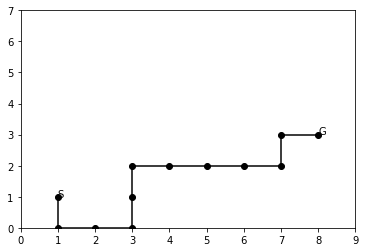

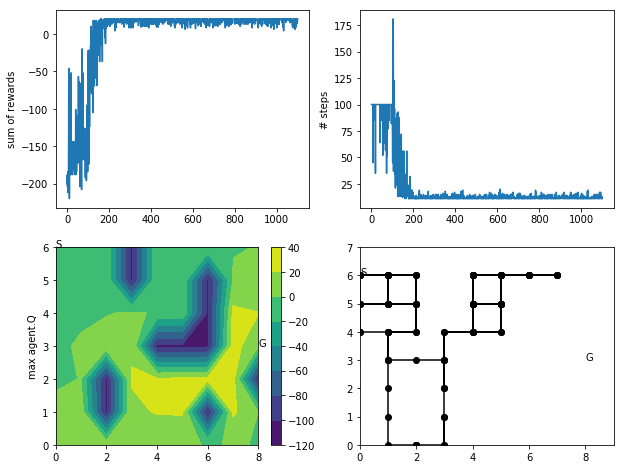

In [233]:
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.7, 
                                   alpha=0.01, 
                                   epsilon=0.7, 
                                   maxiter=100, 
                                   maxstep=100)

test_start = [5,1]
test_trace = agent.test(test_start)
plot_trace(agent,test_start,test_trace)
plot_train(agent, rtrace, steps, trace, start)

[0 1]
[1 1]
[1 2]
[2 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 4]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3

[3 7]
[3 8]
[0 0]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 0]
[0 1]
[1 1]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[0 1]
[1 1]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[0 1]
[1 1]
[1 2]
[2 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 0]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[0 1]
[1 1

[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[5 7]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1

[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[5 4]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[2 3]
[3 3]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[1 1]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 2]
[1 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[5 7]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7

[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[1 2]
[2 2]
[2 1]
[1 1]
[1 2]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[1 1]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 0]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[3 3

[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 0]
[0 1]
[1 1]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[5 7]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[1 1]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6

[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 4]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 0]
[0 1]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 0]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[1 2]
[2 2

[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[1 1]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[5 4]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 0]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 4]
[4 5]
[4 6

[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[4 7]
[3 7]
[3 8]
[0 0]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 5]
[5 5]
[6 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[0 0]
[0 1]
[1 1]
[0 1]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[1 2

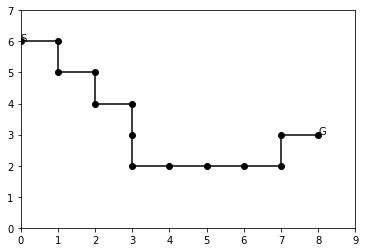

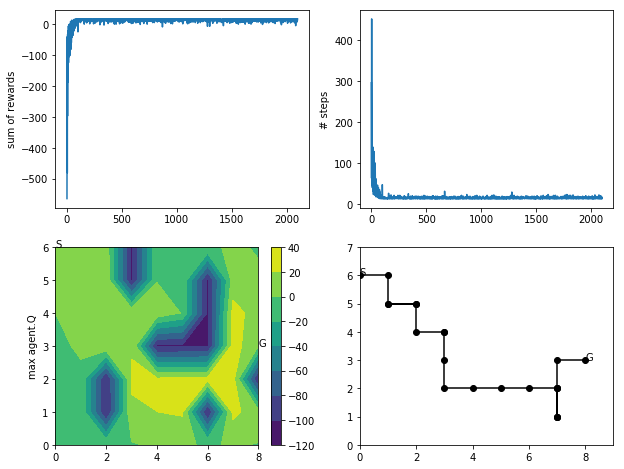

In [234]:
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.9, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=1100, 
                                   maxstep=500)

test_start = [0,0]
test_trace = agent.test(test_start)
plot_trace(agent,test_start,test_trace)
plot_train(agent, rtrace, steps, trace, start)

[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 3]
[4 4]
[5 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[4 7]
[3 7]
[3 8]
[1 0]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 4]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6

[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 5]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 4]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 4]
[2 3]
[3 3

[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3

[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[5 4]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[3 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 3]
[2 4]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[1 1]
[1 2]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 4]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[5 7

[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[1 2]
[2 2]
[3 2]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8

[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 6]
[4 7]
[4 7]
[3 7]
[3 8]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[5 7]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 0]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 1

[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2

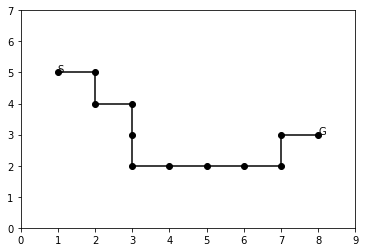

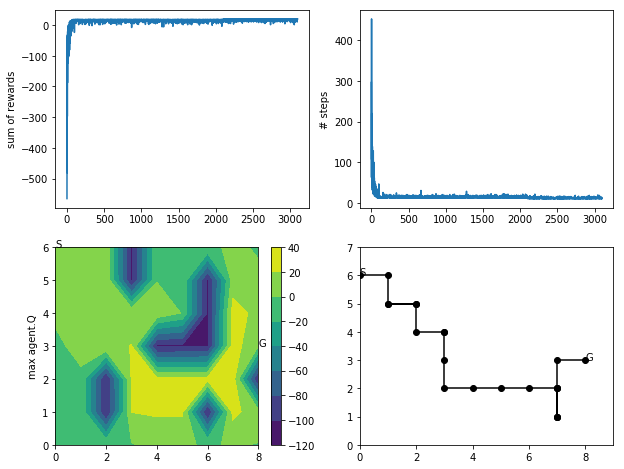

In [235]:
test_start = [1,1]
test_trace = agent.test(test_start)
plot_trace(agent,test_start,test_trace)
plot_train(agent, rtrace, steps, trace, start)

In [236]:
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.90, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=500)


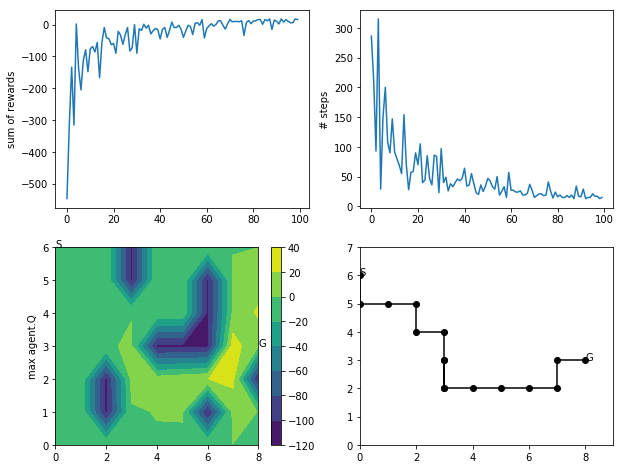

In [237]:
plot_train(agent, rtrace, steps, trace, start)

Below, we are writing the code for getting optimal values of out of a given set of values of gamma, alpha and epsilon. The plots show trace of the rewards gained with values of alpha, gamma and epsilon.

Optimal gamma = 0.2


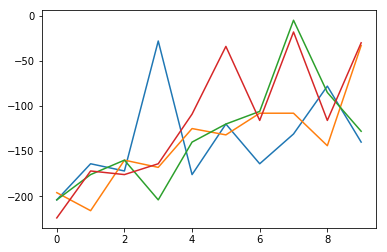

Optimal alpha = 0.2


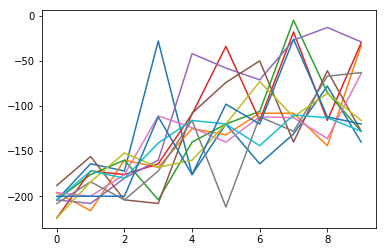

Optimal epsilon = 0.5


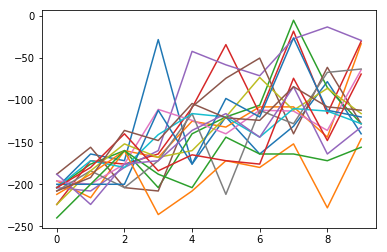

In [240]:
optiAgent = RLAgent(env)
each_gammas = [0.9,0.5,0.2,0.1]
each_alphas = [0.9,0.5,0.2,0.1,0.05,0.02,0.01]
each_epsilons = [0.9,0.8,0.5,0.4,0.2,0.1]

each_rewards = []
for gamma in each_gammas:
    rtrace, steps, trace = optiAgent.train(start, 
                                   gma=gamma, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=10, 
                                   maxstep=100)
    each_rewards.append(rtrace)
max_rewards = []
for i in each_rewards:
    plt.plot(i)
    max_rewards.append(i[np.argmax(i)])
opti_gamma = each_gammas[np.argmax(max_rewards)]
print("Optimal gamma = " + str(opti_gamma))
plt.show()
for alphas in each_alphas:
    rtrace, steps, trace = optiAgent.train(start, 
                                   gma=0.99, 
                                   alpha=alphas, 
                                   epsilon=0.1, 
                                   maxiter=10, 
                                   maxstep=100)
    each_rewards.append(rtrace)
max_rewards = []
plt.show()
for i in each_rewards:
    plt.plot(i)
    max_rewards.append(i[np.argmax(i)])
opti_alpha = each_alphas[np.argmax(max_rewards)]
print("Optimal alpha = " + str(opti_alpha))
for epsilons in each_epsilon:
    rtrace, steps, trace = optiAgent.train(start, 
                                   gma=0.99, 
                                   alpha=0.1, 
                                   epsilon=epsilons, 
                                   maxiter=10, 
                                   maxstep=100)
    each_rewards.append(rtrace)
max_rewards = []
plt.show()
for i in each_rewards:
    plt.plot(i)
    max_rewards.append(i[np.argmax(i)])
opti_epsilon = each_epsilon[np.argmax(max_rewards)]
print("Optimal epsilon = " + str(opti_epsilon))
    
    

[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[0 2]
[1 2]
[2 2]
[2 3]
[2 4]
[1 4]
[2 4]
[2 5]
[2 5]
[2 5]
[1 5]
[1 4]
[0 4]
[0 5]
[0 6]
[0 7]
[1 7]
[1 8]
[2 8]
[3 8]
[1 2]
[2 2]
[2 1]
[2 0]
[3 0]
[3 1]
[3 2]
[3 3]
[4 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[1 1]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4

[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 2]
[1 2]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[3 2]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 4]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6

[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[1 7]
[1 8]
[2 8]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 3]
[3 3]
[4 3]
[5 3]
[6 3]
[6 2]
[6 3]
[6 4]
[6 3]
[6 3

[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[0 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 4]
[2 3]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[0 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 2]
[0 2]
[1 2]
[2 2]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7

[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[5 7]
[4 7]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[5 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3

[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[3 2]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[2 2]
[2 3]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[5 5]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7

[4 6]
[4 7]
[3 7]
[3 8]
[0 1]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 1]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[2 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[5 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 2

[3 8]
[1 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[0 2]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[1 1]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3]
[3 3]
[4 3]
[4 4]
[4 4]
[4 5]
[4 6]
[4 7]
[3 7]
[3 8]
[1 2]
[2 2]
[2 3

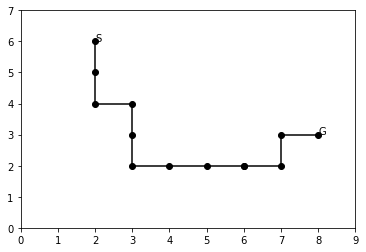

In [241]:
test_start = [0,2]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[1 8]
[1 7]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[2 7]
[3 7]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[1 7]
[1 7]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[2 7]
[1 7]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[2 8]
[1 8]
[2 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[1 7]
[1 8]
[2 8

[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[0 8]
[1 8]
[1 7]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[2 7]
[3 7]
[3 8]
[2 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[1 7]
[1 8]
[0 8]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[1 7]
[1 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8]
[2 8]
[3 8

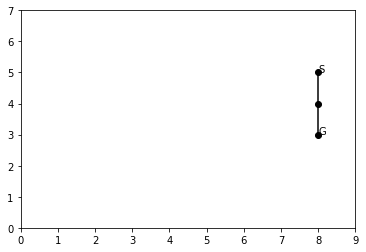

In [242]:
test_start = [1,8]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[0 8]
[0 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[0 7]
[1 7]
[1 8]
[0 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[2 7]
[3 7]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8

[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[0 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[2 8]
[3 8]
[0 7]
[1 7]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8

[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[2 7]
[3 7]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[2 7]
[3 7]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[2 7]
[3 7]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[0 8]
[1 8]
[2 8]
[3 8]
[1 8]
[2 8]
[3 8]
[1 8]
[1 7]
[1 8]
[2 8]
[3 8

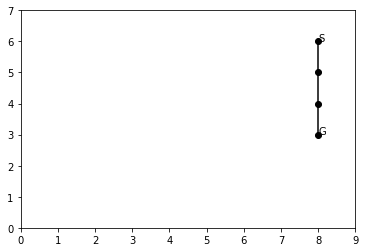

In [243]:
test_start = [0,8]
test_trace = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

# V. Conclusions

* In depth knowledge about reinforcement learning, especially theoretical and mathematical knowledge was gained thorugh this assignment. I found implementing the poker agent difficult as compared to the maze agent.
* Gained indepth understanding of RL algorithms such as Q-Learning and SARSA.
* Properly understood the working of an agent
* Faced difficulty while implementing poker agent, hence could not complete the whole assignment.


# VI. Results

* Optimal Value of Gamma is : 0.2<br>
* Optimal alpha = 0.2<br>
* Optimal Value of Epsilon is : 0.5<br>


# VII. References
* www.stackexchange.com
* Professor Minwoo Lee's notebook
* www.medium.com
* www.google.com
* www.stackoverflow.com
* Book - Reinforcement Learning:An Introduction by Sutton and Barto.
* Book - Intro to Machine Learning by Ethem Alpaydin

# Extra Credit

- Let us have Poker Tournament in class (Nov 6th.)!
- Top 4 (or more) students will get an extra credit. 
- 2 (or more?) unique training attemps will also get an extra credit. (Sales for it to be considered.) 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Maze Problem | 
 | 5| Includes description of maze problem
 | 5| Explains the GridWorld
10 | Poker 
 | 5| Includes description of poker problem
 | 5| Explains the Poker
25 | Methods | 
 | 5| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 |10| Implementation of the selected approach
 | 5| explanation of the codes
45 | Results 
| 5| Reports the selected parameters for both problems. 
|20| Experimental outputs that show the choice of parameters. How do you choose them? (10 points per each problem)
|10| Output plots (5 for each)
|10| reading and analysis of learning results and plots (5 for each)
5 | Conclusions 
